In [11]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [12]:
plt.rcParams["figure.figsize"] = (14,11)
plt.rcParams["font.size"] = 20

# Logistic map:
$x_{n+1} = r*x_n*(1-x_n)$

In [13]:
# define logistic map equation
def logistic_map(r, x):
    return r * x * (1 - x)

In [14]:
def plot_map(N, r, x0):
    x = np.zeros(N)
    x[0] = x0

    for n in range(1,N):
        x[n] = logistic_map(r, x[n-1])

    plt.plot(x,'o-')
    plt.title(f'Evolution of x for $ x_0 = {x[0]:.2f} ,r = {r:.2f} $')
    plt.xlabel('n')
    plt.ylabel('x')
    plt.ylim([0,1])

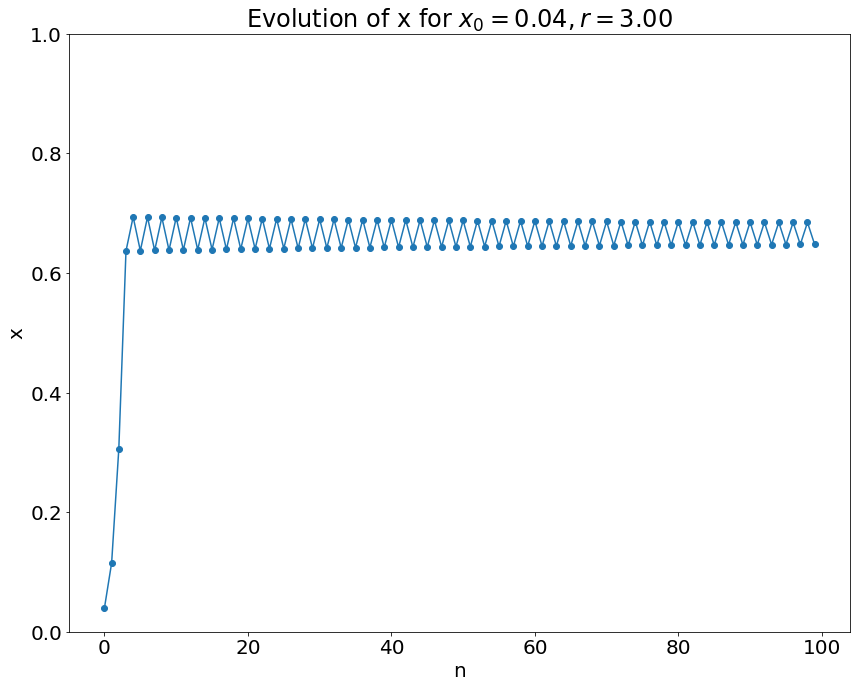

In [15]:
# plot the evolution of x
r = 3
N = 100
x0 = 0.04

plot_map(N, r, x0)

In [16]:
def plot_map2(N, r, x0):
      # plot logistic map and bisector
      t = np.linspace(0,1)
      plt.plot(t, logistic_map(r, t), lw=3)
      plt.plot([0, 1], [0, 1], lw=3)
      x_0 =x0
      # plot x convergence lines
      for i in range(N):
            x1 = logistic_map(r, x0)
            plt.plot([x0, x0], [x0, x1], 'r', lw=1)
            plt.plot([x0, x1], [x1, x1], 'r', lw=1)
            plt.plot([x0], [x1], 'or')
            x0 = x1

      plt.title(f'Evolution of x for $ x_0 = {x_0:.2f} ,r = {r:.2f} $')
      plt.xlabel('$x_n$')
      plt.ylabel('$x_{n+1}$')

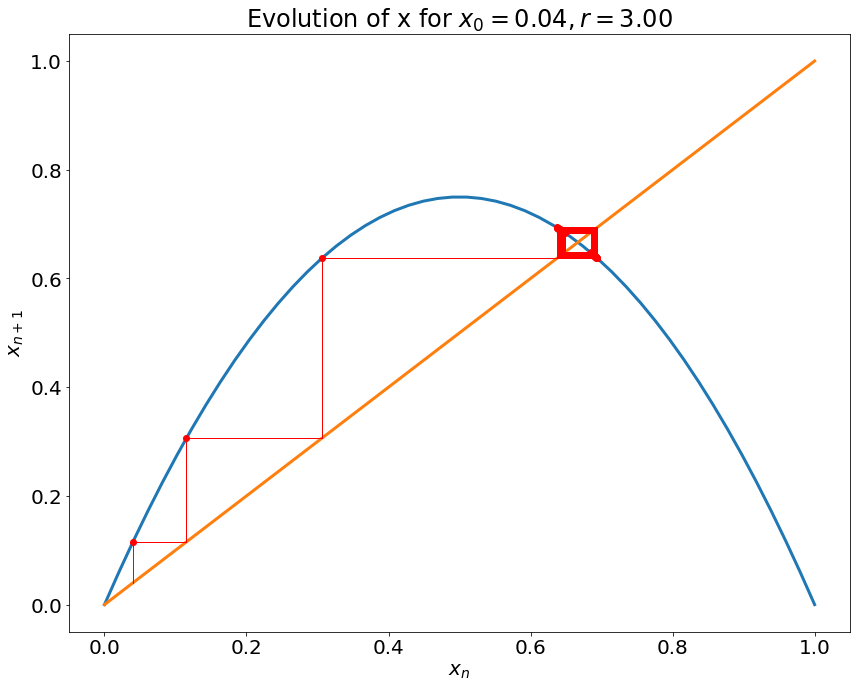

In [17]:
# plot the evolution of x
x0 = 0.04
r = 3

plot_map2(N, r, x0)

In [9]:
# animate the evolution of x with different r
r = 0
N = 100

fig = plt.figure()
ax = plt.axes()

def update(i):
    plt.cla()
    plot_map(N, i, x0)

# call the animator	 
anim = FuncAnimation(fig, update, frames=np.arange(0,4,0.05), interval=100)

# save the animation as a gif file 
anim.save('x_evolution.gif', writer="pillow")
plt.close()

HTML('<img src="x_evolution.gif">')

MovieWriter ffmpeg unavailable; using Pillow instead.


In [10]:
# animate the evolution of x with different r
r = 0
N = 100
x0 = 0.04

fig = plt.figure()
ax = plt.axes()

def update(i):
    plt.cla()
    plot_map2(N, i, x0)

# call the animator	 
anim = FuncAnimation(fig, update, frames=np.arange(0,4,0.05), interval=100)

# save the animation as a gif file 
anim.save('x_evolution_bisector.gif', writer="pillow")
plt.close()

HTML('<img src="x_evolution_bisector.gif">')

MovieWriter ffmpeg unavailable; using Pillow instead.


In [18]:
# save m last x
def SaveX(r,x0,m):
    x = np.zeros(N)
    x[0] = x0

    for n in range(1,N):
        x[n] = logistic_map(r, x[n-1])
    return x[-m:]

$x^{{(r)}}_{{n}} = r * x^{{(r)}}_{{n-1}} * (1 - x^{{(r)}}_{{n-1}})$

In [19]:
def bif_map(m, N, x0):
    r = np.linspace(0, 4.0, N)
    x = np.zeros((len(r),m))

    # plot bifurcation map
    plt.title(f"Bifurcation Map for $ x_0 ={x0:.2f}, m = {m}$")
    plt.xlabel('r')
    plt.ylabel('$x^{(r)}_{n}$')

    for i,r_i in enumerate(r):
        x[i,:] = SaveX(r_i,x0,m)
        plt.plot(r_i * np.ones(m), x[i,:], ',k')

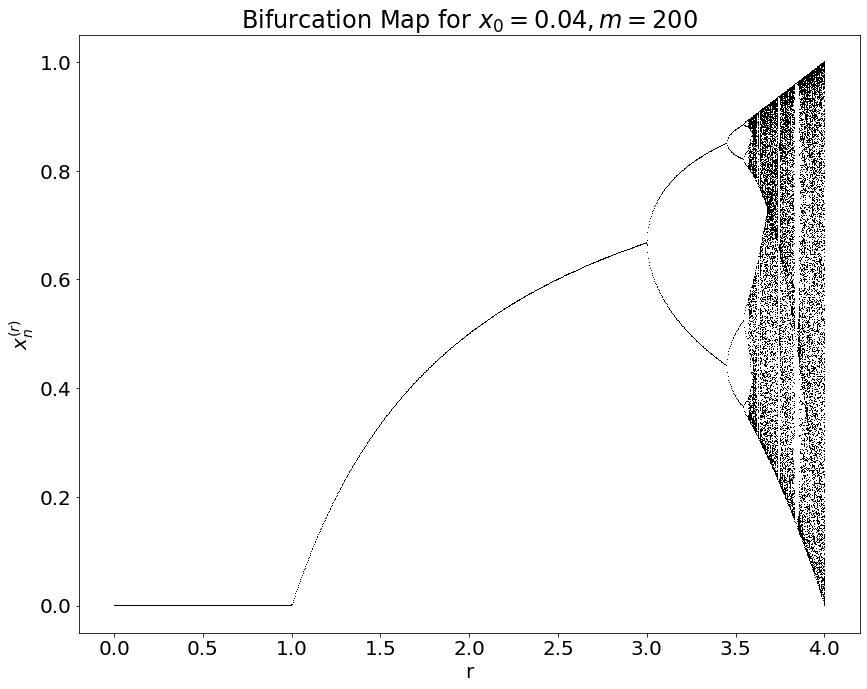

In [20]:
m=200
N = 1000
x0 = 0.04
     
bif_map(m,N,x0)